In [5]:
# 01.importing libraries

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [6]:
# 02. data exploration

df = pd.read_csv(r"C:\Users\arulm\Downloads\Bakery.csv")

In [9]:
df

,TransactionNo,Items,DateTime,Daypart,DayType
0,1.0,Bread,30-10-2016 09:58,Morning,Weekend
1,2.0,Scandinavian,30-10-2016 10:05,Morning,Weekend
2,2.0,Scandinavian,30-10-2016 10:05,Morning,Weekend
3,3.0,Hot chocolate,30-10-2016 10:07,Morning,Weekend
4,3.0,Jam,30-10-2016 10:07,Morning,Weekend
...,...,...,...,...,...
20502,9682.0,Coffee,04-09-2017 14:32,Afternoon,Weekend
20503,9682.0,Tea,04-09-2017 14:32,Afternoon,Weekend
20504,9683.0,Tea,04-09-2017 14:57,Afternoon,Weekend
20505,9683.0,Pastry,04-09-2017 14:57,Afternoon,Weekend


In [132]:
df.head()

,TransactionNo,Items,DateTime,Daypart,DayType
0,1.0,Bread,30-10-2016 09:58,Morning,Weekend
1,2.0,Scandinavian,30-10-2016 10:05,Morning,Weekend
2,2.0,Scandinavian,30-10-2016 10:05,Morning,Weekend
3,3.0,Hot chocolate,30-10-2016 10:07,Morning,Weekend
4,3.0,Jam,30-10-2016 10:07,Morning,Weekend


In [134]:
df.tail()

,TransactionNo,Items,DateTime,Daypart,DayType
20502,9682.0,Coffee,04-09-2017 14:32,Afternoon,Weekend
20503,9682.0,Tea,04-09-2017 14:32,Afternoon,Weekend
20504,9683.0,Tea,04-09-2017 14:57,Afternoon,Weekend
20505,9683.0,Pastry,04-09-2017 14:57,Afternoon,Weekend
20506,9684.0,Smoothies,04-09-2017 15:04,Afternoon,Weekend


In [136]:
df.columns.to_list()

['TransactionNo', 'Items', 'DateTime', 'Daypart', 'DayType']

In [138]:
df.shape

(20507, 5)

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   TransactionNo  20504 non-null  float64
 1   Items          20507 non-null  object 
 2   DateTime       20507 non-null  object 
 3   Daypart        20507 non-null  object 
 4   DayType        20501 non-null  object 
dtypes: float64(1), object(4)
memory usage: 801.2+ KB


In [142]:
df.describe()

,TransactionNo
count,20504.000000
mean,4976.370903
std,2796.205995
min,1.000000
25%,2552.000000
50%,5137.000000
75%,7357.000000
max,9684.000000


In [13]:
df.dtypes

TransactionNo    float64
Items             object
DateTime          object
Daypart           object
DayType           object
dtype: object

In [193]:
#03. data cleaning

In [143]:
df.isnull().sum()

TransactionNo    3
Items            0
DateTime         0
Daypart          0
DayType          6
dtype: int64

In [154]:
df["TransactionNo"]=df["TransactionNo"].fillna(df["TransactionNo"].mean())

In [148]:
df.isna().sum()

TransactionNo    0
Items            0
DateTime         0
Daypart          0
DayType          6
dtype: int64

In [165]:
df["DayType"]=df["DayType"].fillna(df["DayType"].mode()[0])

In [173]:
df.isna().sum()

TransactionNo    0
Items            0
DateTime         0
Daypart          0
DayType          0
dtype: int64

In [199]:
# checking for duplicates


if df.duplicated().sum() > 0:
    print("There are duplicates in the dataset")
else:
    print("There are no duplicates in the dataset")

There are no duplicates in the dataset


In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18887 entries, 0 to 20506
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   TransactionNo  18887 non-null  float64
 1   Items          18887 non-null  object 
 2   DateTime       18887 non-null  object 
 3   Daypart        18887 non-null  object 
 4   DayType        18887 non-null  object 
dtypes: float64(1), object(4)
memory usage: 885.3+ KB


In [203]:
df.describe()

,TransactionNo
count,18887.000000
mean,4951.234506
std,2811.403299
min,1.000000
25%,2497.500000
50%,5082.000000
75%,7378.500000
max,9684.000000


In [207]:
df.head()

,TransactionNo,Items,DateTime,Daypart,DayType
0,1.0,Bread,30-10-2016 09:58,Morning,Weekend
1,2.0,Scandinavian,30-10-2016 10:05,Morning,Weekend
3,3.0,Hot chocolate,30-10-2016 10:07,Morning,Weekend
4,3.0,Jam,30-10-2016 10:07,Morning,Weekend
5,3.0,Cookies,30-10-2016 10:07,Morning,Weekend


In [211]:
# 03. data visualization

# item analysis

item_count = df['Items'].value_counts().reset_index().rename(columns = {'count' : 'Frequency'})
item_count

,Items,Frequency
0,Coffee,4526
1,Bread,3097
2,Tea,1351
3,Cake,983
4,Pastry,815
...,...,...
89,Bacon,1
90,Gift voucher,1
91,Olum & polenta,1
92,Raw bars,1


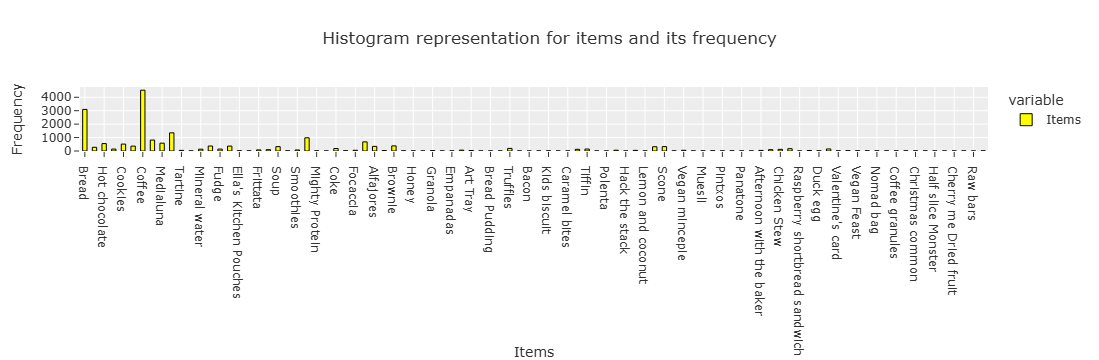

In [228]:
# horizontal barplotply

fig = px.histogram(df["Items"], nbins=1, title='Histogram representation for items and its frequency', labels={'value': 'Number of Items'})

fig.update_layout(
    xaxis_title='Items',
    yaxis_title='Frequency',
    bargap=0.55, 
    barmode='overlay',  
    template='ggplot2'  
)

fig.update_traces(marker_color='yellow', marker_line_color='black', marker_line_width=1)

fig.show()

In [234]:
#day part analysis

day = df['Daypart'].value_counts().reset_index().rename(columns = {'count' : 'No_of_Transactions'})
day

,Daypart,No_of_Transactions
0,Afternoon,10687
1,Morning,7697
2,Evening,490
3,Night,13


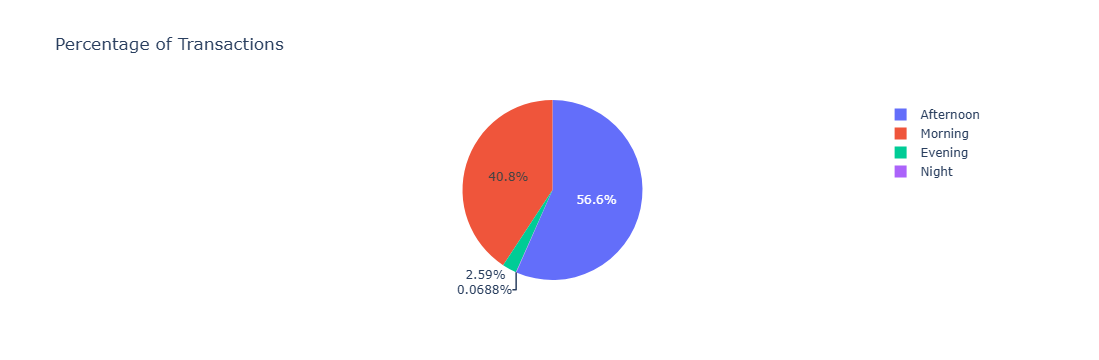

In [236]:
fig = px.pie(day , values = 'No_of_Transactions' , names = 'Daypart'  , title = 'Percentage of Transactions')
fig.show()

In [258]:
# converting datetime column to datetime datatype

df['DateTime'] = pd.to_datetime(df['DateTime'])

# create a new date column

df['Date'] = df['DateTime'].dt.date


# create a new time column

df['Time'] = df['DateTime'].dt.time

In [260]:
df

,TransactionNo,Items,DateTime,Daypart,DayType,Date,Time
0,1.0,Bread,2016-10-30 09:58:00,Morning,Weekend,2016-10-30,09:58:00
1,2.0,Scandinavian,2016-10-30 10:05:00,Morning,Weekend,2016-10-30,10:05:00
2,2.0,Scandinavian,2016-10-30 10:05:00,Morning,Weekend,2016-10-30,10:05:00
3,3.0,Hot chocolate,2016-10-30 10:07:00,Morning,Weekend,2016-10-30,10:07:00
4,3.0,Jam,2016-10-30 10:07:00,Morning,Weekend,2016-10-30,10:07:00
...,...,...,...,...,...,...,...
20502,9682.0,Coffee,2017-09-04 14:32:00,Afternoon,Weekend,2017-09-04,14:32:00
20503,9682.0,Tea,2017-09-04 14:32:00,Afternoon,Weekend,2017-09-04,14:32:00
20504,9683.0,Tea,2017-09-04 14:57:00,Afternoon,Weekend,2017-09-04,14:57:00
20505,9683.0,Pastry,2017-09-04 14:57:00,Afternoon,Weekend,2017-09-04,14:57:00


In [262]:
# cumulative transaction growth over time period

df['DateTime'] = pd.to_datetime(df['DateTime'])

df = df.sort_values('Date')

df['Cumulative_Count'] = df['TransactionNo'].cumsum()

df.head()

,TransactionNo,Items,DateTime,Daypart,DayType,Date,Time,Cumulative_Count
499,245.0,Cake,2016-01-11 15:37:00,Afternoon,Weekday,2016-01-11,15:37:00,245.0
402,196.0,Bread,2016-01-11 11:08:00,Morning,Weekday,2016-01-11,11:08:00,441.0
401,195.0,Scandinavian,2016-01-11 11:06:00,Morning,Weekday,2016-01-11,11:06:00,636.0
400,195.0,Bread,2016-01-11 11:06:00,Morning,Weekday,2016-01-11,11:06:00,831.0
399,194.0,Bread,2016-01-11 11:04:00,Morning,Weekday,2016-01-11,11:04:00,1025.0


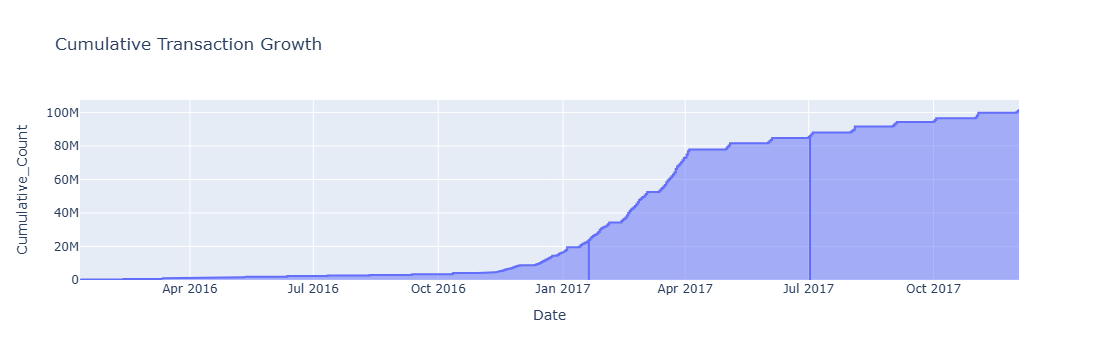

In [264]:
# plotting the area chart using plotly

fig = px.area(df , x = 'Date' , y = 'Cumulative_Count' ,  title = 'Cumulative Transaction Growth')
fig.show()

In [268]:
# monthly sales trends

df['Month'] = df['DateTime'].dt.month
df['Year'] = df['DateTime'].dt.year

monthly_sales = df.groupby(['Month' , 'Year'])['TransactionNo'].sum().reset_index()
monthly_sales

,Month,Year,TransactionNo
0,1,2016,230920.0
1,1,2017,15384857.0
2,2,2016,303016.0
3,2,2017,17346512.0
4,3,2016,556608.0
5,3,2017,23635456.0
6,4,2016,405192.0
7,4,2017,5076641.0
8,5,2016,471465.0
9,5,2017,3722705.0


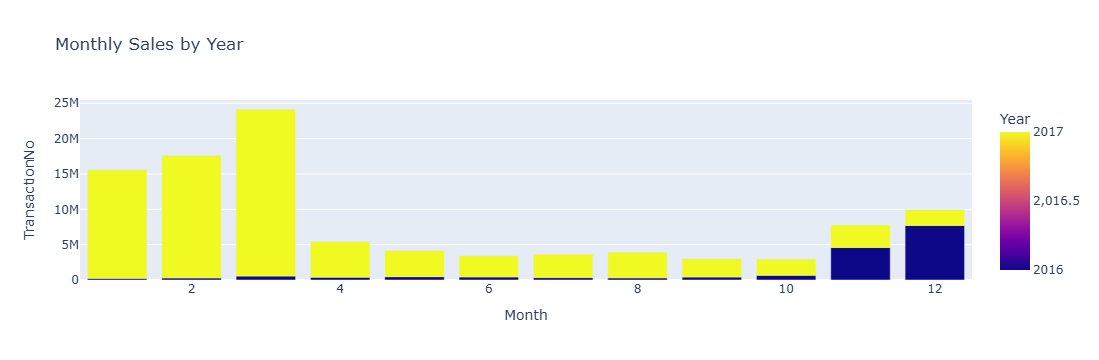

In [270]:
# separate monthly sales by year

year_2016 = monthly_sales[monthly_sales['Year'] == 2016]['TransactionNo']
year_2017 = monthly_sales[monthly_sales['Year'] == 2017]['TransactionNo']


fig = px.bar(monthly_sales, x='Month', y='TransactionNo' , color='Year', barmode='group',
             title='Monthly Sales by Year')

fig.show()

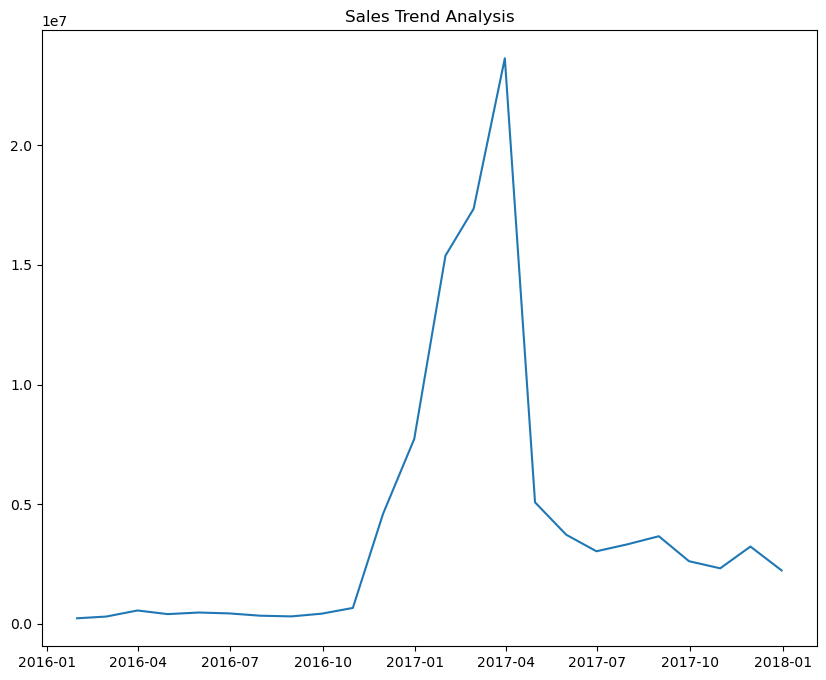

In [272]:
# sales trends by time

sales_data = df[['DateTime', 'TransactionNo']]

sales_data = sales_data.set_index('DateTime', inplace=False)

monthly = sales_data.resample('M').sum()

plt.figure(figsize=(10, 8))
plt.plot(monthly.index , monthly['TransactionNo'])
plt.title('Sales Trend Analysis')
plt.show()